## Voting

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_47116/2405587113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도 : {accuracy_score(y_test, pred):.4f}')

classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도 : {accuracy_score(y_test, pred):.4f}')

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import warnings
warnings.filterwarnings('ignore')

## RandomForest

In [4]:
# 데이터 전처리
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('datasets/UCI HAR Dataset/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+
                                                                                              str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# get_new_feature_name_df(feature_name_df)

import pandas as pd
def get_human_dataset():
    # 각 데이터 파일이 공백으로 분리되어 있어, 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/features.txt', sep=' ',
                                 header=None, names=['column_index', 'column_name'])
    # 중복 이름 변경
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('./datasets/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    # print(x_train)
    x_test = pd.read_csv('./datasets/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./datasets/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./datasets/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

param_rf = {"max_depth" : [5,7,10,16,20,25],
            "min_samples_split" : [2,3]
            }

gscv_dt = GridSearchCV(estimator = rf_clf, param_grid = param_rf, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)
gscv_dt.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 7, 10, 16, 20, 25],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [6]:
# gscv_dt.best_params_ # {'max_depth': 7, 'min_samples_split': 2}
gscv_dt.best_score_ # 0.9155343508272341

0.9155343508272341

In [7]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

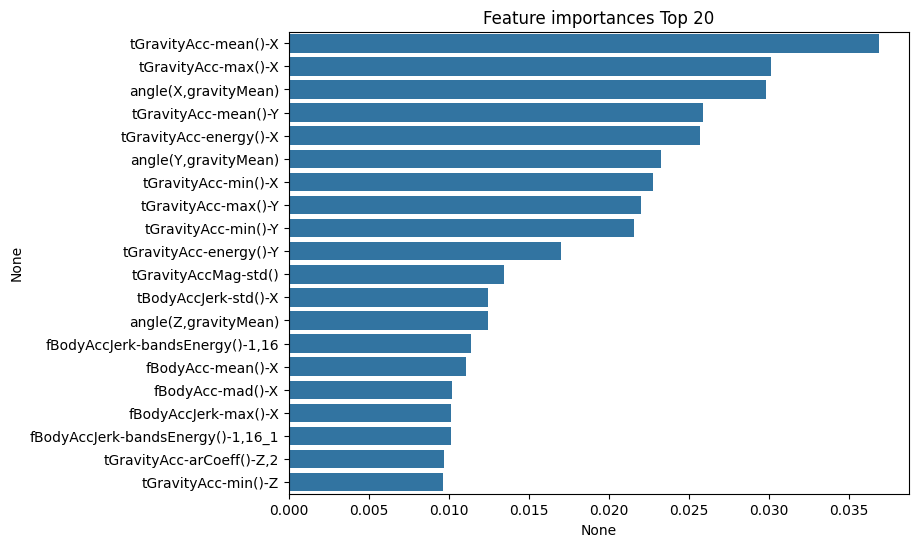

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_

# Series : index, value값 출력
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [9]:
feature_selected_train = X_train[list(ftr_top20.index)]
feature_selected_train

,tGravityAcc-mean()-X,tGravityAcc-max()-X,"angle(X,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-energy()-X,"angle(Y,gravityMean)",tGravityAcc-min()-X,tGravityAcc-max()-Y,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,tGravityAccMag-std(),tBodyAccJerk-std()-X,"angle(Z,gravityMean)","fBodyAccJerk-bandsEnergy()-1,16",fBodyAcc-mean()-X,fBodyAcc-mad()-X,fBodyAccJerk-max()-X,"fBodyAccJerk-bandsEnergy()-1,16_1","tGravityAcc-arCoeff()-Z,2",tGravityAcc-min()-Z
0,0.963396,0.892055,-0.841247,-0.140840,0.899469,0.179941,0.977436,-0.161265,-0.123213,-0.970905,-0.950551,-0.993519,-0.058627,-0.999982,-0.994783,-0.996889,-0.996737,-0.999900,0.995675,0.056483
1,0.966561,0.892060,-0.844788,-0.141551,0.907829,0.180289,0.984520,-0.161343,-0.114893,-0.970583,-0.976057,-0.995548,-0.054317,-0.999987,-0.997451,-0.997890,-0.997425,-0.999817,0.834271,0.102764
2,0.966878,0.892401,-0.848933,-0.142010,0.908668,0.180637,0.986770,-0.163711,-0.114893,-0.970368,-0.988020,-0.990743,-0.049118,-0.999963,-0.993594,-0.994097,-0.995163,-0.999732,0.714392,0.102764
3,0.967615,0.893817,-0.848649,-0.143976,0.910621,0.181935,0.986821,-0.163711,-0.121336,-0.969400,-0.986421,-0.992697,-0.047663,-0.999978,-0.995491,-0.994547,-0.993402,-0.999798,0.386373,0.095753
4,0.968224,0.893817,-0.847865,-0.148750,0.912235,0.185151,0.987434,-0.166786,-0.121834,-0.967051,-0.991275,-0.996420,-0.043892,-0.999988,-0.997286,-0.997725,-0.997009,-0.999878,0.239268,0.094059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.923148,0.867718,-0.791883,-0.222004,0.794766,0.238604,0.920554,-0.214233,-0.234998,-0.918375,-0.093688,-0.299527,0.049819,-0.775736,-0.131366,-0.050748,-0.581040,-0.839183,0.802503,-0.071977
7348,0.918343,0.866116,-0.771840,-0.242054,0.782407,0.252676,0.920554,-0.231477,-0.234998,-0.902880,-0.148539,-0.350932,0.050053,-0.780751,-0.159077,-0.177661,-0.534744,-0.843252,0.721749,-0.068919
7349,0.919810,0.854641,-0.779133,-0.236950,0.786085,0.249145,0.933008,-0.249134,-0.216004,-0.907561,-0.158701,-0.345455,0.040811,-0.783616,-0.345767,-0.249486,-0.482657,-0.840560,0.835444,-0.068919
7350,0.922323,0.855988,-0.785181,-0.233230,0.792538,0.246432,0.933008,-0.244267,-0.210542,-0.910648,-0.185720,-0.387107,0.025339,-0.821137,-0.400368,-0.247028,-0.498131,-0.822665,0.858624,-0.040009


## Boosting

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# adaboost 분류기 객체 생성
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# adaboost 분류기 훈련
model = abc.fit(X_train, y_train)

# 테스트 데이터 세트 모델 실행
y_tahmin = model.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, y_tahmin)}')

정확도 : 1.0


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
model = gb_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, y_pred)}')

정확도 : 1.0


In [13]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
model = lgbm_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

ModuleNotFoundError: No module named 'lightgbm'

In [15]:
pip install lightgbm

  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.3.0-py3-none-macosx_14_0_arm64.whl size=1408561 sha256=626649c3f5705cbb6c72908ce469e2b8b821a1eac8dbacb24452099ccfaed52c
  Stored in directory: /Users/minzy/Library/Caches/pip/wheels/f4/d1/f4/3cd66516e5a05b0879846879dfb06e5a087f453adb405a5999
Successfully built lightgbm
Note: you may need to restart the kernel to use updated packages.


In [14]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)